# Notebook 2

## Digital health and computational epidemiology
Author: Michele Tizzoni

---

# Introduction to NetworkX
---

We will use the Python library [NetworkX](https://networkx.github.io/index.html). It is well documented and several [examples](https://networkx.github.io/documentation/networkx-2.0/auto_examples/index.html) are available.

It is not the only Python library available for network analysis. Another very good one is [graph-tool](https://graph-tool.skewed.de/).
Also the [SNAP library](http://snap.stanford.edu/data/index.html) provides an excellent tool to analyze very large networks.


## NetworkX preliminaries

In [1]:
import networkx as nx

from operator import itemgetter

import math
import numpy as np

We import the plotting library seaborn which integrates very well with matplotlib.
More documentation is available here: https://seaborn.pydata.org/

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

---
Generate an empty UNDIRECTED graph with NetworkX

In [6]:
G=nx.Graph()

Add nodes from a list of names

In [7]:
G.add_nodes_from(['Luca','Andrea','Sara','Carlo','Veronica'])

In [8]:
G.nodes()

NodeView(('Luca', 'Andrea', 'Sara', 'Carlo', 'Veronica'))

Add another node

In [9]:
G.add_node('Giovanni')

print("The nodes of G are: ", G.nodes())

The nodes of G are:  ['Luca', 'Andrea', 'Sara', 'Carlo', 'Veronica', 'Giovanni']


So far we have nodes in the networks but no edges.
Let's add edges from a list of tuples.

In [16]:
G.add_edges_from([('Luca','Sara'),('Andrea','Luca'),
('Carlo','Veronica'),('Sara','Veronica'),('Giovanni','Andrea')])

We add another edge and 'Lucia' is a new node.

In [11]:
G.add_edge('Veronica','Lucia')

print("The nodes of G are : ", G.nodes())
print('---')
print("The links of G are : ", G.edges())


The nodes of G are :  ['Luca', 'Andrea', 'Sara', 'Carlo', 'Veronica', 'Giovanni', 'Lucia']
---
The links of G are :  [('Luca', 'Sara'), ('Luca', 'Andrea'), ('Andrea', 'Giovanni'), ('Sara', 'Veronica'), ('Carlo', 'Veronica'), ('Veronica', 'Lucia')]


We want to add the property 'age' to each node. By default, each node is assigned to an empty dictionary to store metadata.

In [12]:
G.nodes['Lucia']

{}

In [13]:
for n in G.nodes():
    if n[0]=='L':
        G.nodes[n]['age']=24
    else:
        G.nodes[n]['age']=28

#show the nodes with their age
print(G.nodes(data=True))

[('Luca', {'age': 24}), ('Andrea', {'age': 28}), ('Sara', {'age': 28}), ('Carlo', {'age': 28}), ('Veronica', {'age': 28}), ('Giovanni', {'age': 28}), ('Lucia', {'age': 24})]


How to remove a node?

In [17]:
G.remove_node('Luca')
print(G.nodes(data=True))
print('---')
print(G.edges())

[('Andrea', {'age': 28}), ('Sara', {'age': 28}), ('Carlo', {'age': 28}), ('Veronica', {'age': 28}), ('Giovanni', {'age': 28}), ('Lucia', {'age': 24})]
---
[('Andrea', 'Giovanni'), ('Sara', 'Veronica'), ('Carlo', 'Veronica'), ('Veronica', 'Lucia')]


If we remove an edge, we do not remove the nodes! 

In [18]:
G.remove_edge('Giovanni', 'Andrea')

In [19]:
print(G.nodes())

['Andrea', 'Sara', 'Carlo', 'Veronica', 'Giovanni', 'Lucia']


Degree is easily accessible

In [20]:
G.degree('Veronica')

3

In [21]:
G.degree()

DegreeView({'Andrea': 0, 'Sara': 1, 'Carlo': 1, 'Veronica': 3, 'Giovanni': 0, 'Lucia': 1})

In [22]:
for i in G.degree():
    print(i[0], G.degree()[i[0]])

Andrea 0
Sara 1
Carlo 1
Veronica 3
Giovanni 0
Lucia 1


### Analyze the citHepTh network with NetworkX
---
We analyze the citation dataset (citHepTh) available on the [Stanford Large Network Data Colletion](http://snap.stanford.edu/data/index.html). 

Keep in mind that the network is directed!

In [23]:
filepath='./../datasets/'

In [24]:
H=nx.DiGraph()

In [25]:
fh=open(filepath+'cit-HepTh.txt','r')

#reading all the file lines
for line in fh.readlines():
    #remove "\n" characters (.strip()) and split the line at blank spaces (split.())
    s=line.strip().split()
    if s[0]!='#':
        #the first lines are comments
        origin=int(s[0])
        dest=int(s[1])
        
        H.add_edge(origin,dest)
    
#chiudo il file
fh.close()

In [26]:
print("The network has", len(H), "nodes")

The network has 27770 nodes


In [27]:
print("The network has", len(H.edges()), "edges")

The network has 352807 edges


#### We want to count how many nodes have a given degree-in
The Counter module is a dictionary subclass that allows quick item counting.

In [29]:
indeg=dict(H.in_degree()).values()

In [30]:
from collections import Counter 

degin_distri=Counter(indeg)
print(degin_distri)

Counter({0: 4590, 1: 3787, 2: 2700, 3: 1992, 4: 1643, 5: 1327, 6: 1134, 7: 903, 8: 823, 9: 692, 10: 591, 11: 527, 12: 484, 13: 447, 14: 409, 15: 322, 16: 293, 18: 278, 17: 274, 19: 249, 20: 223, 22: 185, 21: 185, 24: 161, 23: 161, 28: 137, 25: 136, 26: 128, 30: 127, 27: 126, 29: 120, 32: 100, 33: 88, 31: 88, 35: 87, 37: 82, 38: 74, 41: 72, 43: 69, 39: 67, 34: 67, 36: 66, 45: 56, 42: 53, 40: 52, 46: 52, 44: 50, 49: 48, 47: 44, 56: 36, 50: 34, 54: 33, 51: 33, 52: 32, 53: 31, 59: 29, 57: 29, 48: 29, 55: 28, 62: 28, 58: 27, 64: 26, 60: 25, 61: 25, 68: 24, 79: 24, 63: 23, 65: 23, 67: 23, 70: 22, 71: 21, 66: 21, 69: 19, 75: 19, 76: 18, 73: 17, 94: 17, 77: 15, 82: 15, 89: 14, 85: 14, 87: 13, 74: 13, 81: 12, 84: 11, 95: 10, 88: 10, 96: 10, 72: 10, 97: 10, 106: 10, 92: 9, 80: 9, 102: 9, 101: 9, 113: 9, 99: 9, 118: 8, 114: 8, 107: 8, 105: 8, 78: 8, 83: 8, 109: 8, 91: 7, 86: 7, 100: 7, 90: 6, 148: 6, 104: 6, 124: 6, 142: 6, 144: 6, 136: 6, 133: 6, 172: 6, 116: 6, 108: 6, 93: 6, 115: 5, 126: 5, 11

(1.0, 10000.0, 1e-05, 1.0)

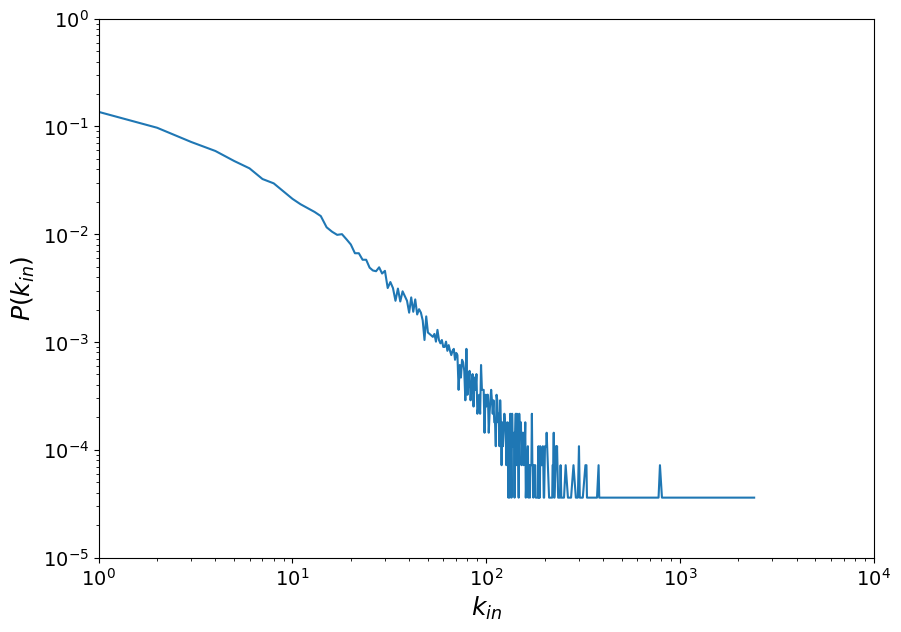

In [31]:
x=[]
y=[]

for i in sorted(degin_distri):   
    x.append(i)
    y.append(degin_distri[i]/len(H))

plt.figure(figsize=(10,7))    
plt.plot(x,y)

plt.xlabel('$k_{in}$', fontsize=18)
plt.ylabel('$P(k_{in})$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.yscale('log')
plt.xscale('log')
plt.axis([1,10000,0.00001,1.0])

Let's plot the degree out distribution

In [33]:
outdeg=dict(H.out_degree()).values()
degout_distri=Counter(outdeg)

(1.0, 10000.0, 1e-05, 1.0)

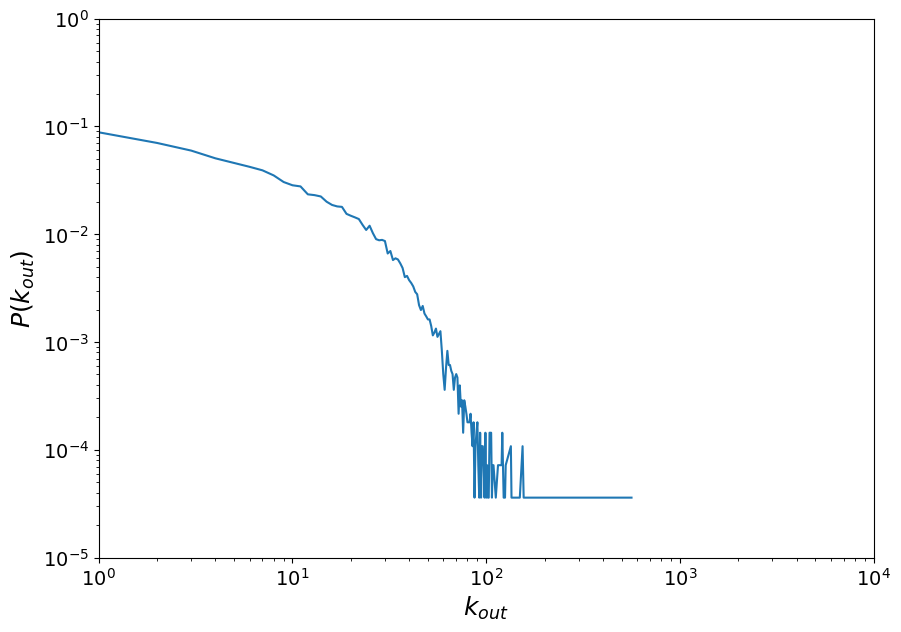

In [34]:
x=[]
y=[]
for i in sorted(degout_distri):   
    x.append(i)
    y.append(float(degout_distri[i])/len(H))

plt.figure(figsize=(10,7))    
plt.plot(np.array(x),np.array(y))

plt.xlabel('$k_{out}$', fontsize=18)
plt.ylabel('$P(k_{out})$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.yscale('log')
plt.xscale('log')
plt.axis([1,10000,0.00001,1.0])

#### Export to gml (be careful this is a large network!)

The file in gml format can be visualized using the software tool Gephi (http://gephi.org).

In [32]:
#nx.write_gml(H,'./../network_data/citHepTh.gml')

## Visualizing a network with NetworkX

NetworkX combined with matplotlib can be used to visualize complex networks. 

It provides a good range of functionalities to obtain some basic and more refined visualization. More details are available in the [documentation](https://networkx.github.io/documentation/stable/reference/drawing.html).

Notice, as stated in the documentation
>NetworkX provides basic functionality for visualizing graphs, but its main goal is to enable graph analysis rather than perform graph visualization. 
>In the future, graph visualization functionality may be removed from NetworkX or only available as an add-on package.


We generate a random Erdos-Rényi network and visualize it.

In [35]:
N=100
prob=0.08

In [36]:
ER=nx.erdos_renyi_graph(N, prob)

(-1.1983803599253822,
 1.0877171211194987,
 -0.924242227784815,
 0.8533158903642257)

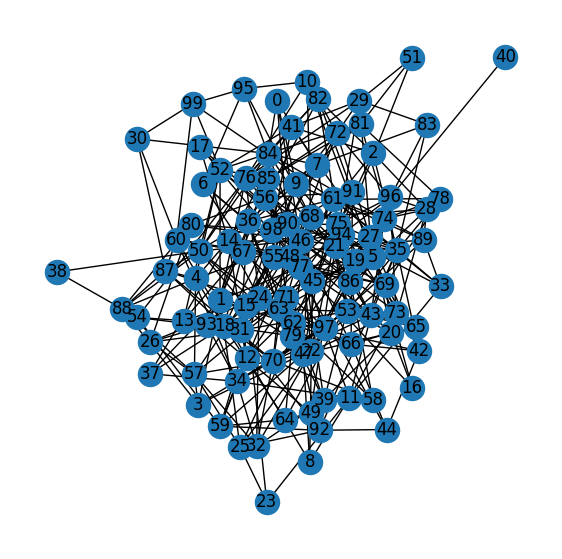

In [41]:
plt.figure(figsize=(7,7))
nx.draw_networkx(ER)
plt.axis('off')

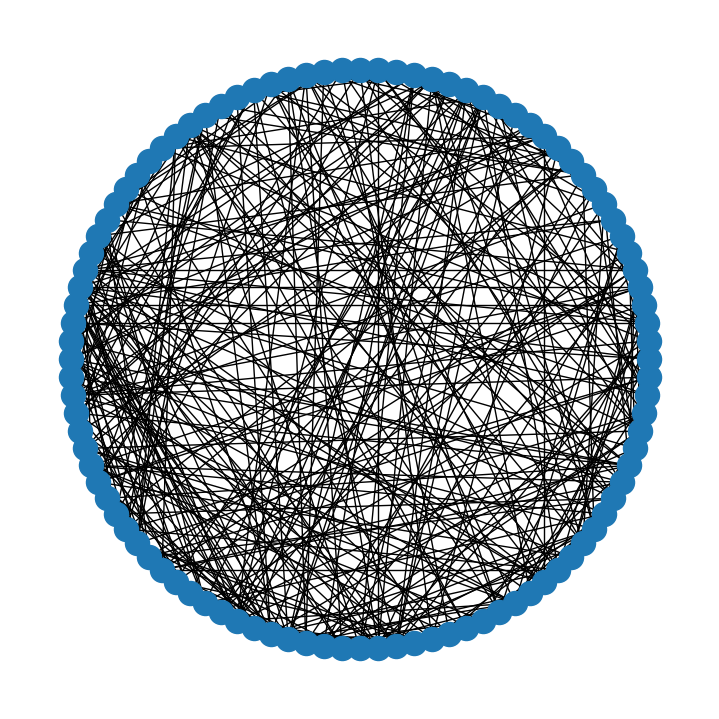

In [39]:
plt.figure(figsize=(7,7))
nx.draw_circular(ER)

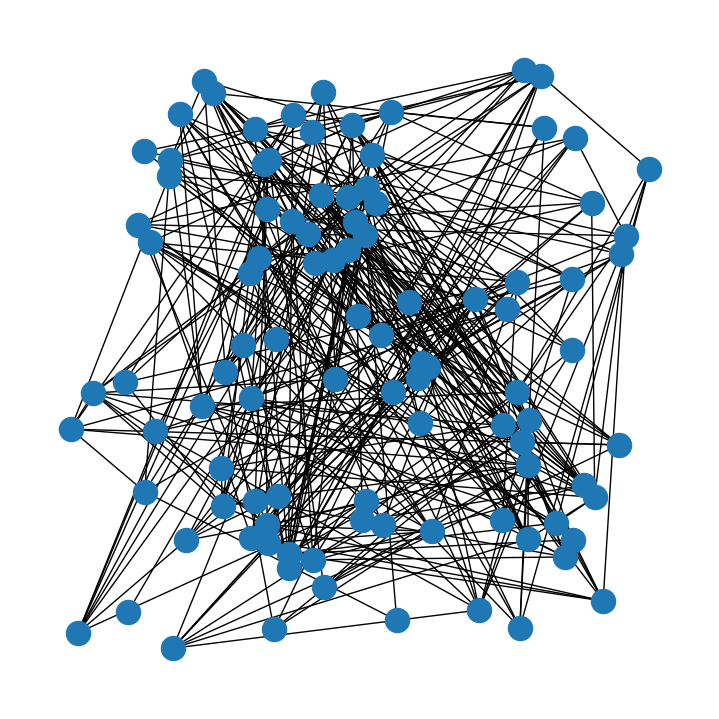

In [40]:
plt.figure(figsize=(7,7))
nx.draw_random(ER)

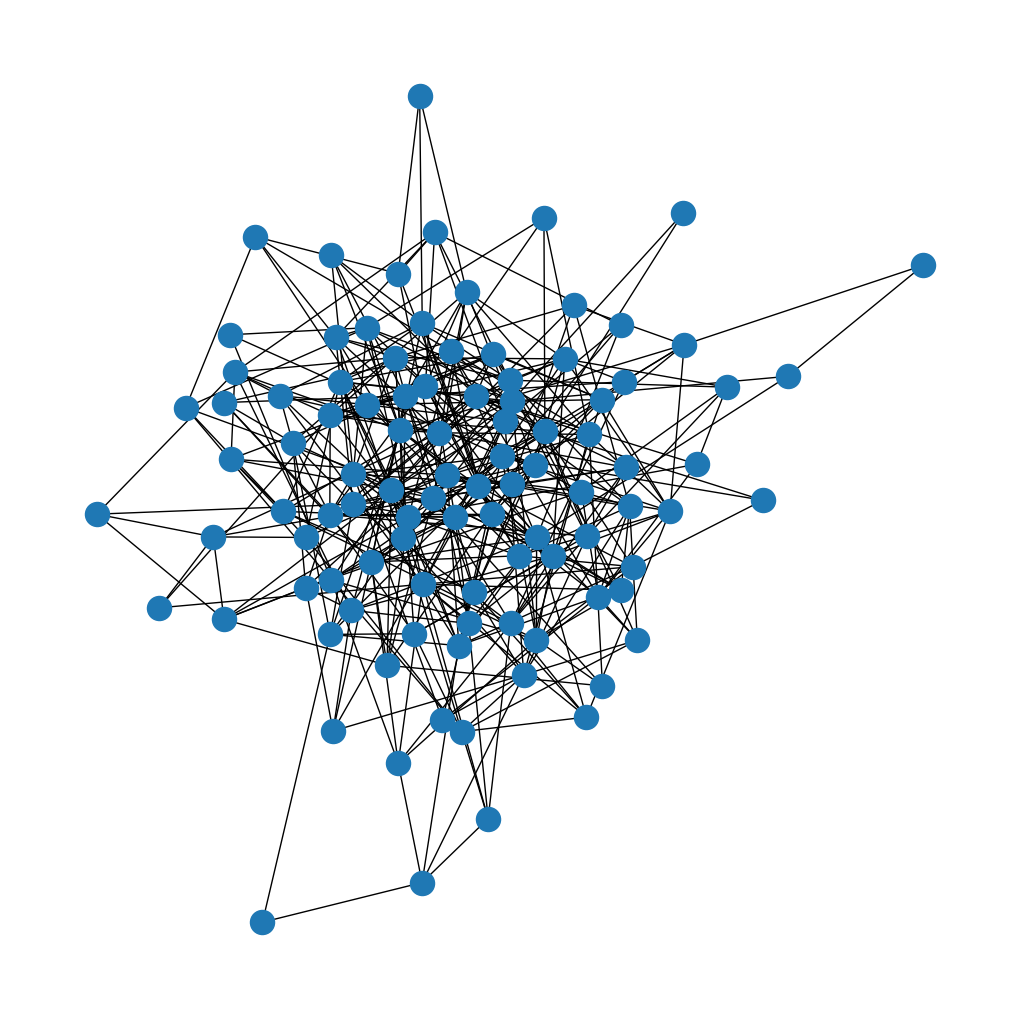

In [46]:
plt.figure(figsize=(10,10))
nx.draw_spring(ER)

In [43]:
pos=nx.spring_layout(ER)
pos

{0: array([-0.320943  ,  0.10044154]),
 1: array([ 0.08268447, -0.04172231]),
 2: array([-0.19806229,  0.48718707]),
 3: array([-0.22507409, -0.53096166]),
 4: array([ 0.1840362 , -0.58050105]),
 5: array([0.29439339, 0.16384973]),
 6: array([0.56372789, 0.29840873]),
 7: array([-0.51359141,  0.1243607 ]),
 8: array([-0.32260721, -0.04221145]),
 9: array([-0.11659401,  0.20463763]),
 10: array([0.47704342, 0.35632656]),
 11: array([-0.12760482, -0.35190045]),
 12: array([0.16392056, 0.29477229]),
 13: array([-0.72288956, -0.08268557]),
 14: array([0.31433782, 0.20848464]),
 15: array([-0.43711634, -0.21685251]),
 16: array([0.22385241, 0.76761421]),
 17: array([0.65067502, 0.04674251]),
 18: array([-0.0069424 , -0.32829227]),
 19: array([ 0.31422337, -0.34047771]),
 20: array([-0.04285925,  0.46038791]),
 21: array([-0.18182207,  0.36338982]),
 22: array([ 0.15361034, -0.52068142]),
 23: array([-0.53899776, -0.60944796]),
 24: array([ 0.15170549, -0.12291757]),
 25: array([-0.24023226,

We can draw the network nodes only, and assign a specific location to each node.

(-1.0266720607318893,
 1.0965081933681853,
 -0.7738389203691344,
 0.841016739702222)

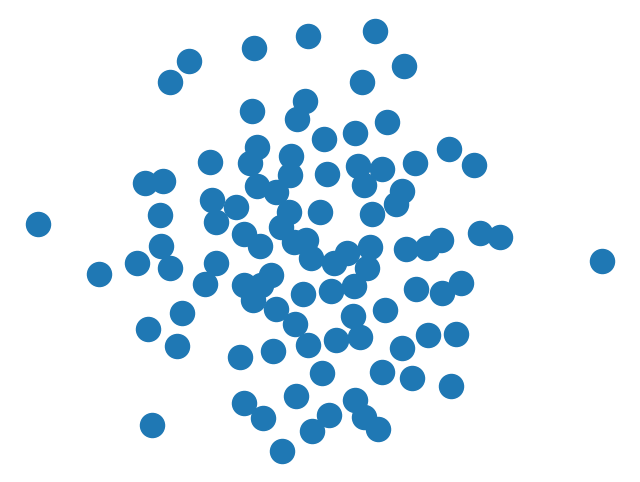

In [44]:
plt.figure(figsize=(8,6))
nx.draw_networkx_nodes(ER, pos)
plt.axis('off')

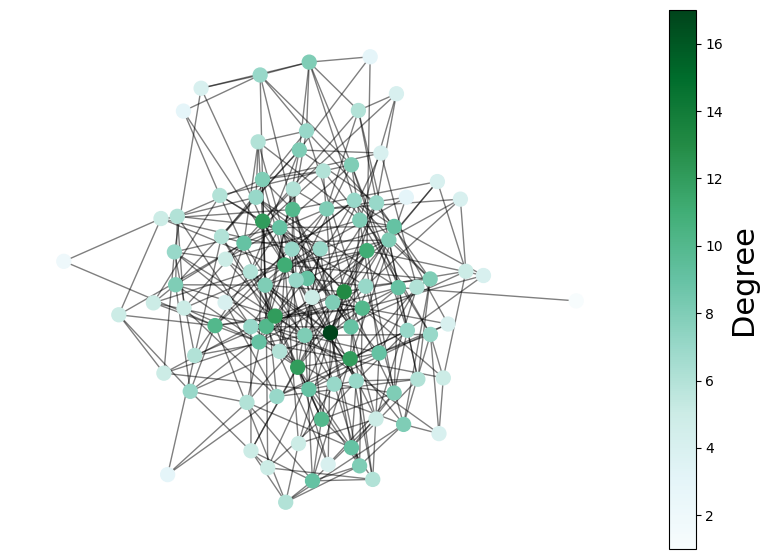

In [46]:
plt.figure(figsize=(10,7))

s=nx.draw_networkx_nodes(ER,
            pos,
            node_size=100.0,
            node_color=list(dict(nx.degree(ER)).values()),
            alpha=1,
            cmap=plt.cm.BuGn
            )

nx.draw_networkx_edges(ER, pos, alpha=0.5)

#show the colorbar on the right side
cbar=plt.colorbar(s)
cbar.ax.set_ylabel('Degree', size=22)

plt.axis('off')
plt.show()

## Visualizing a spatial network with NetworkX

We analyze the US airport network of year 2010. 
The network is available from the [network repository of Tore Opshal](https://toreopsahl.com/datasets/#usairports).

Weights represent the total number of passengers who traveled on that connection in a year.

Airport coordinates have been added by myself.


In [46]:
airport_path='./../datasets/USairport_2010.txt'

In [47]:
meta_path='./../datasets/USairport_2010_codes.txt'

In [48]:
G=nx.Graph()
fh=open(airport_path,'r')
for line in fh.readlines():
    s=line.strip().split()
    G.add_edge(int(s[0]),int(s[1]))
fh.close()    

In [50]:
len(G)

405

Is the network fully connected?

In [51]:
nx.number_connected_components(G)

2

The first connected component in the list is always the largest

In [52]:
c=list(nx.connected_components(G))
c[1]

{1182, 1347}

We define three dictionaries associated to the network to store additional node's features: IATA code, aiport name, geographic coordinates.

In [53]:
G.code={}
G.name={}
G.pos={}

We extract nodes features from a file

In [58]:
finfo=open(meta_path,'r')
for line in finfo.readlines():
    s=line.strip().split()
    node=int(s[0])
    G.code[node]=s[1]
    G.name[node]=s[2]
    G.pos[node]=(float(s[4]), float(s[3]))
finfo.close() 

Draw the network

(-127.0525636795403, -65.23493632045967, 23.337955614957576, 50.01204438504242)

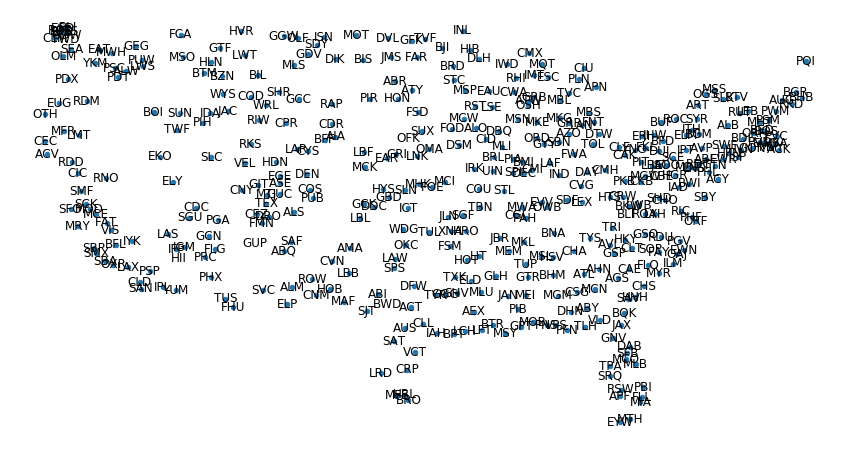

In [61]:
fig=plt.figure(figsize=(15,8))

nx.draw_networkx_nodes(G,
            pos=G.pos,
            node_size=20
            )

#nx.draw_networkx_edges(G,pos=G.pos)

nx.draw_networkx_labels(G, pos=G.pos, labels=G.code)

plt.axis('off')

We would like to draw the edges but there are too many of them.

In [62]:
len(G.edges())

8251

We select only the strongest connections as a subgraph of G by setting a threshold on the annual passengers volume.

In [64]:
weight_threshold=300000

In [65]:
H=nx.Graph()

H.pos={}
H.code={}
H.name={}

fh=open(airport_path,'r')
for line in fh.readlines():
    s=line.strip().split()
    node1=int(s[0])
    node2=int(s[1])
    
    weight=int(s[2])
    
    if weight>weight_threshold:
        H.add_edge(node1,node2)
        
        H.pos[node1]=G.pos[node1]
        H.pos[node2]=G.pos[node2]
        
        H.code[node1]=G.code[node1]
        H.code[node2]=G.code[node2]
        
        H.name[node1]=G.name[node1]
        H.name[node2]=G.name[node2]
        
fh.close()

In [66]:
len(H.edges())

205

We draw the network and color code the nodes by their degree.

/Users/Michele/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


(-127.05322413269565, -65.2342758673043, 23.336684461326623, 50.01331553867337)

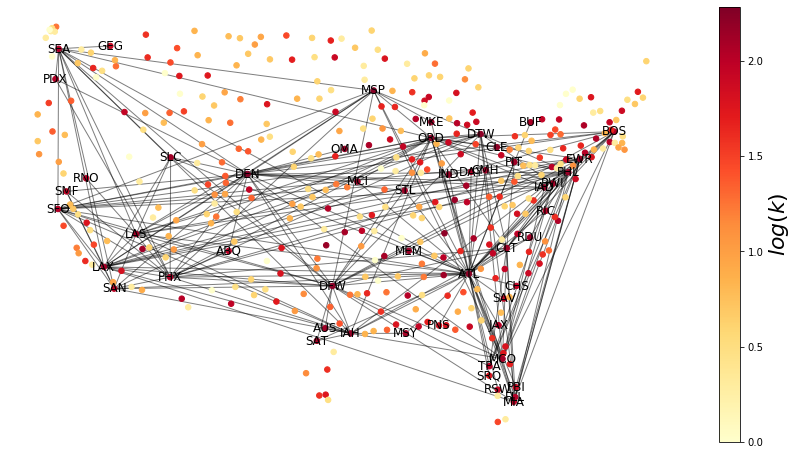

In [67]:
fig=plt.figure(figsize=(15,8))

s=nx.draw_networkx_nodes(G,
            pos=G.pos,
            node_color=[math.log(G.degree(v), 10) for v in G],
            node_size=30,
            cmap=plt.cm.YlOrRd
            )

nx.draw_networkx_edges(H,
            pos=G.pos,
            alpha=0.5
            )

nx.draw_networkx_labels(H,
            pos=H.pos,
            labels=H.code,
            )

cbar=plt.colorbar(s)
cbar.ax.set_ylabel('$log(k)$', size=22)

plt.axis('off')

What is the node with the largest degree?

In [68]:
max(dict(G.degree()).items(), key=itemgetter(1))

(389, 192)

In [69]:
G.name[389]

'Denver'

---
# Combine NetworkX with geopandas

In [50]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point